<a href="https://colab.research.google.com/github/Roipp16/Health-Data-Science-Repo/blob/main/Stroke_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/stroke.csv")
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [ ]:
#we search for unique values
for col in data.columns:
  print(f"Valores únicos en '{col}': {data[col].unique()}")

Valores únicos en 'id': [ 9046 51676 31112 ... 19723 37544 44679]
Valores únicos en 'gender': ['Male' 'Female' 'Other']
Valores únicos en 'age': [6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+

In [ ]:
#Let's change data type and reorder the table

data= data.replace({"Male" : 1, "Female" : 2, "Other": 3,
             "Yes" : 1, "No": 0,
            "Never_worked":0, "Private": 1, "Self-employed": 2,"Govt_job":3,"children":4,
             "Urban": 1, "Rural": 2,
             "never smoked": 0, "formerly smoked" : 1, "smokes": 2, "Unknown": np.nan})
data.head(10)


<ipython-input-3-8316a439fb7e>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data= data.replace({"Male" : 1, "Female" : 2, "Other": 3,


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,1,1,228.69,36.6,1.0,1
1,51676,2,61.0,0,0,1,2,2,202.21,NaN,0.0,1
2,31112,1,80.0,0,1,1,1,2,105.92,32.5,0.0,1
3,60182,2,49.0,0,0,1,1,1,171.23,34.4,2.0,1
4,1665,2,79.0,1,0,1,2,2,174.12,24.0,0.0,1
5,56669,1,81.0,0,0,1,1,1,186.21,29.0,1.0,1
6,53882,1,74.0,1,1,1,1,2,70.09,27.4,0.0,1
7,10434,2,69.0,0,0,0,1,1,94.39,22.8,0.0,1
8,27419,2,59.0,0,0,1,1,2,76.15,NaN,NaN,1
9,60491,2,78.0,0,0,1,1,1,58.57,24.2,NaN,1


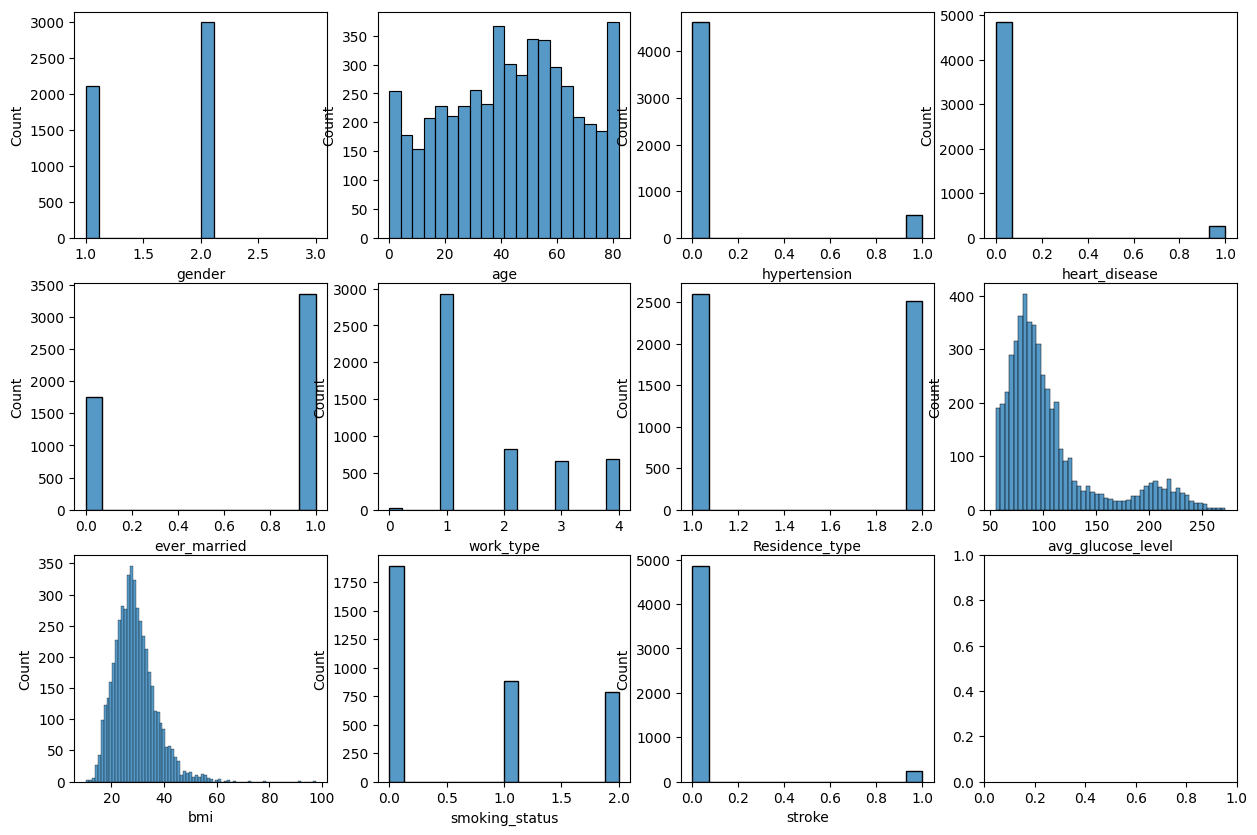

In [ ]:
#Data visualization
columns=data.columns[1:]



fig, axes = plt.subplots(3, 4, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.histplot(data, x=col , ax=axes[i])



In [ ]:
#We now have some variables that seem to be anormaly distributed. Let's see some more measures of centralization, dispersion, and position to guide ourselves.
data.describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,3566.000000,5110.000000
mean,36517.829354,1.586301,43.226614,0.097456,0.054012,0.656164,1.816438,1.491977,106.147677,28.893237,0.690690,0.048728
std,21161.721625,0.492941,22.612647,0.296607,0.226063,0.475034,1.105673,0.499985,45.283560,7.854067,0.810144,0.215320
min,67.000000,1.000000,0.080000,0.000000,0.000000,0.000000,0.000000,1.000000,55.120000,10.300000,0.000000,0.000000
25%,17741.250000,1.000000,25.000000,0.000000,0.000000,0.000000,1.000000,1.000000,77.245000,23.500000,0.000000,0.000000
50%,36932.000000,2.000000,45.000000,0.000000,0.000000,1.000000,1.000000,1.000000,91.885000,28.100000,0.000000,0.000000
75%,54682.000000,2.000000,61.000000,0.000000,0.000000,1.000000,3.000000,2.000000,114.090000,33.100000,1.000000,0.000000
max,72940.000000,3.000000,82.000000,1.000000,1.000000,1.000000,4.000000,2.000000,271.740000,97.600000,2.000000,1.000000


In [ ]:
#What about the correlation?
data.corr().sort_values("stroke", ascending=False)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
stroke,0.006388,-0.009200,0.245257,0.127904,0.134914,0.108340,-0.054503,-0.015458,0.131945,0.042374,0.021686,1.000000
age,0.003538,0.027300,1.000000,0.276398,0.263796,0.679125,-0.394848,-0.014180,0.238171,0.333398,0.047766,0.245257
heart_disease,-0.001296,-0.085749,0.263796,0.108306,1.000000,0.114644,-0.054297,-0.003092,0.161857,0.041357,0.058759,0.134914
avg_glucose_level,0.001092,-0.054213,0.238171,0.174474,0.161857,0.155068,-0.064592,0.004946,1.000000,0.175502,0.013859,0.131945
hypertension,0.003550,-0.021390,0.276398,1.000000,0.108306,0.164243,-0.069583,0.007913,0.174474,0.167811,-0.000050,0.127904
ever_married,0.013690,0.029366,0.679125,0.164243,0.114644,1.000000,-0.353475,-0.006261,0.155068,0.341695,0.069894,0.108340
bmi,0.003084,0.025658,0.333398,0.167811,0.041357,0.341695,-0.342833,0.000122,0.175502,1.000000,0.037541,0.042374
smoking_status,-0.004268,-0.077047,0.047766,-0.000050,0.058759,0.069894,-0.032622,-0.038841,0.013859,0.037541,1.000000,0.021686
id,1.000000,-0.001406,0.003538,0.003550,-0.001296,0.013690,-0.019858,0.001403,0.001092,0.003084,-0.004268,0.006388
gender,-0.001406,1.000000,0.027300,-0.021390,-0.085749,0.029366,-0.063582,-0.005529,-0.054213,0.025658,-0.077047,-0.009200


<Axes: >

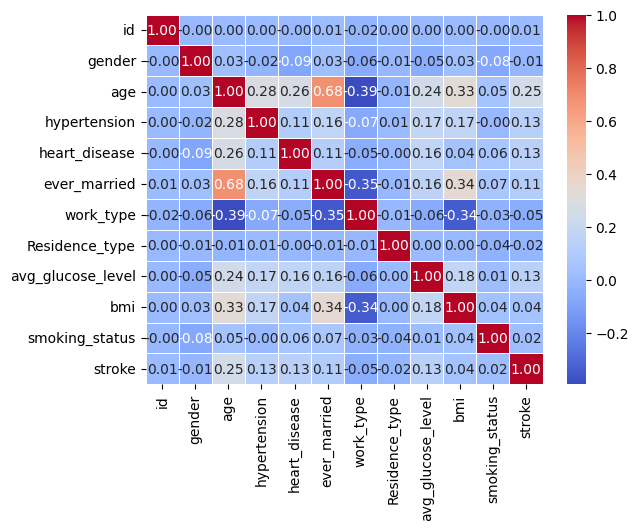

In [ ]:
#There is not any potential correlation, let's look at it.
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)


That's quite interesting. We were looking for potential correlations with stroke, and we also found a potential correlation age-ever_married.
Obviously, as people get older, the % of people married will be higher. We are going to analyse it as well.



Married x Age:  LeveneResult(statistic=0.57562160616869, pvalue=0.44806865286013176)
Stroke x Age:  LeveneResult(statistic=129.73660960413392, pvalue=1.0651819334659263e-29)


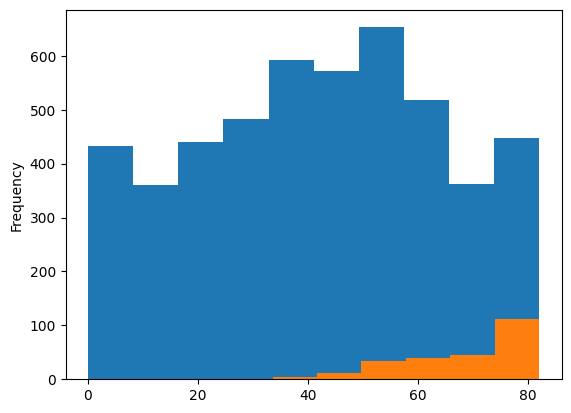

In [ ]:
#First, let me check the homoscedasticity
import scipy.stats as stats

g1= data.loc[data["ever_married"] == 0, "age"]
g2= data.loc[data["ever_married"] == 1, "age"]

g3= data.loc[data["stroke"] == 0, "age"]
g4= data.loc[data["stroke"] == 1, "age"]

print(f"Married x Age:  {stats.levene(g1,g2)}")

print(f"Stroke x Age:  {stats.levene(g3,g4)}")

g3.plot(kind="hist")
g4.plot(kind="hist")
plt.show()
#we have a big difference with the number of stroke cases, we can see it at the plot.


In [ ]:
#And we'll check also the normality
statistic1, p_val1 = stats.shapiro(g1)
statistic2, p_val2 = stats.shapiro(g2)
statistic3, p_val3 = stats.shapiro(g3)
statistic4, p_val4 = stats.shapiro(g4)
print(f"no married: Statistic={statistic1}, p-value={p_val1}")
print(f"yes married: Statistic={statistic2}, p-value={p_val2}")
print(f"no stroke: Statistic={statistic3}, p-value={p_val3}")
print(f"yes stroke: Statistic={statistic4}, p-value={p_val4}")



no married: Statistic=0.8682955231279303, p-value=4.2846885662186486e-36
yes married: Statistic=0.9752616158230374, p-value=1.08718926162712e-23
no stroke: Statistic=0.9704794002161514, p-value=1.6332581961459548e-30
yes stroke: Statistic=0.8781331826248, p-value=3.173724865197424e-13


In [ ]:
statistic5, p_val5 = stats.ks_2samp(g1,g2)
statistic6, p_val6 = stats.ks_2samp(g3,g4)
stat, p_val = stats.kstest(g1, 'norm', args=(np.mean(g1), np.std(g1)))


print(f"no married: Statistic={stat}, p-value={p_val}")
print(f"yes married: Statistic={statistic6}, p-value={p_val6}")


no married: Statistic=0.1355184197215048, p-value=1.3250619745771606e-28
yes married: Statistic=0.5408500903428567, p-value=3.840128777460624e-65


In [ ]:
stat1, p1 = stats.mannwhitneyu(g1, g2)
stat2, p2  = stats.mannwhitneyu(g3, g4)
print(f"Mann-Whitney U test (no stroke vs yes stroke): Statistic = {stat1}, p-value = {p1}")
print(f"Mann-Whitney U test (no married vs yes married): Statistic = {stat2}, p-value = {p2}")


Mann-Whitney U test (no stroke vs yes stroke): Statistic = 566958.5, p-value = 0.0
Mann-Whitney U test (no married vs yes married): Statistic = 200263.5, p-value = 3.726634665900011e-71


So this is my analysis.
Conclusions extracted are that stroke is correlated with age, as we could have guessed. In the same way,we see age - marriage_status correlation, where older people are more probably married.

From statistical analysis, we discovered a significance between all our previous thoughts. Nevertheless, a further study, in which a more equitative sample of stroke-no stroke is presented needs to be done, as the statistical analysis will be more confident.

In the next work a predictor model for stroke will be predicted.